## GREEN IT & SUSTAINABILITY CODE ON GOOGLE COMPANY ON DIFFERENT ASPECTS

In [ ]:
#### PLEASE LOOK FOR ALL DIFFERENT KINDS OF CSV NAMES AS EACH NEW MARDOWN HAS TAKEN A NEW CSV FILE 

### 1. Line Chart (Annual CO₂ emissions over Years)
- **Significance**: This line chart displays the trend of annual CO₂ emissions over the years for various sources (industry, flaring, cement, gas, oil, coal) in European countries.
- This chart is significant for Google's sustainability efforts because it provides a clear visualization of how CO₂ emissions have been changing over time in key countries. It helps identify trends, such as whether emissions are increasing, decreasing, or remaining stable, which is crucial for assessing the effectiveness of sustainability initiatives. 

### 2. Area Chart (Total Annual CO₂ emissions by Source)
- **Significance**: This area chart illustrates the total annual CO₂ emissions by different sources (industry, flaring, cement, gas, oil, coal) aggregated over the years for European countries.
- This chart is significant because it provides a comprehensive overview of the contribution of each emission source to the total CO₂ emissions in countries over time. By visualizing the proportion of emissions from each source, Google can identify which sectors or activities are the primary contributors to CO₂ emissions. This information is valuable for prioritizing green IT initiatives and sustainability efforts. For example, if the chart shows that emissions from coal are significantly higher compared to other sources, Google can focus on transitioning to cleaner energy sources or implementing energy-efficient technologies in industries heavily reliant on coal.


In [79]:
import pandas as pd
import plotly.express as px

# Load the data from CSV file
file_path = r"C:\Users\CHHAVI\Downloads\co2-by-source.csv"
df = pd.read_csv(file_path)

# Remove rows with missing values
df = df.dropna(subset=['Year', 'emissions_from_industry', 
                       'emissions_from_flaring', 
                       'emissions_from_cement',
                       'emissions_from_gas',
                       'emissions_from_oil',
                       'emissions_from_coal'])

# 1. Line Chart (Annual CO₂ emissions over Years) for Europe
europe_df = df[df['Country'].isin(['Austria', 'Belgium', 'Germany', 'France', 'Italy', 'Netherlands', 'Poland', 'Spain', 'Sweden', 'United Kingdom'])]
line_chart_europe = px.line(europe_df, x='Year', y=['emissions_from_industry', 
                                                     'emissions_from_flaring', 
                                                     'emissions_from_cement',
                                                     'emissions_from_gas',
                                                     'emissions_from_oil',
                                                     'emissions_from_coal'],
                            title='Annual CO₂ emissions over Years (Europe)',
                            labels={'value': 'Annual CO₂ emissions (kt)'})

line_chart_europe.show()

# 2. Area Chart (Total Annual CO₂ emissions by Source) for Europe
total_emissions_df = europe_df.groupby('Year').sum().reset_index()
total_emissions_df = total_emissions_df.melt(id_vars='Year', var_name='Source', value_name='Total CO₂ emissions')
area_chart_europe = px.area(total_emissions_df, x='Year', y='Total CO₂ emissions', color='Source',
                            title='Total Annual CO₂ emissions by Source (Europe)',
                            labels={'Total CO₂ emissions': 'Total CO₂ emissions (kt)'})
area_chart_europe.show()

# 3. CO₂ emissions chart for each country
country_line_charts = []
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    country_line_chart = px.line(country_data, x='Year', y=['emissions_from_industry', 
                                                            'emissions_from_flaring', 
                                                            'emissions_from_cement',
                                                            'emissions_from_gas',
                                                            'emissions_from_oil',
                                                            'emissions_from_coal'],
                                 title=f'Annual CO₂ emissions over Years ({country})',
                                 labels={'value': 'Annual CO₂ emissions (kt)'})
    country_line_charts.append(country_line_chart)

# Display each country's CO₂ emissions chart
for chart in country_line_charts:
    chart.show()


C:\Users\CHHAVI\AppData\Local\Temp\ipykernel_7920\199725625.py:30: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [72]:
import pandas as pd
import plotly.express as px

# Load the data from Excel file
file_path = r"C:\Users\CHHAVI\Downloads\Data-file-Europe-Power-Sector-2020.xlsx"
df = pd.read_excel(file_path)

# Filter out only the rows representing European countries
europe_df = df[df['Area'].isin(['Austria', 'Belgium', 'Germany', 'France', 'Italy', 'Netherlands', 'Poland', 'Spain', 'Sweden', 'United Kingdom'])]

# 1. Bar Chart (Generation by Country and Energy Source)
bar_chart = px.bar(europe_df, x='Area', y='Generation (TWh)', color='Variable', 
                   title='Generation by Country and Energy Source (Europe 2020)',
                   labels={'Generation (TWh)': 'Generation (TWh)'})
bar_chart.show()

# 2. Line Chart (Change in Generation Over Time by Country)
line_chart = px.line(europe_df, x='Year', y='Change on last year (TWh)', color='Area', 
                     title='Change in Generation Over Time by Country (Europe 2020)',
                     labels={'Change on last year (TWh)': 'Change in Generation (TWh)'})
line_chart.show()


In [73]:
import pandas as pd

# Load the data from Excel file
file_path = r"C:\Users\CHHAVI\Downloads\Data-file-Europe-Power-Sector-2020.xlsx"
df = pd.read_excel(file_path)

# Filter out only the rows representing European countries
europe_df = df[df['Area'].isin(['Austria', 'Belgium', 'Germany', 'France', 'Italy', 'Netherlands', 'Poland', 'Spain', 'Sweden', 'United Kingdom'])]

# Filter out only the rows representing the generation (Production) for each fuel type
fuel_generation = europe_df[europe_df['Variable'] == 'Production']

# Calculate the net generation for each fuel type
fuel_generation['Net Generation'] = fuel_generation.groupby('Variable')['Generation (TWh)'].transform('sum')

# Sort the fuel types based on their net generation
most_sustainable_fuel = fuel_generation.sort_values(by='Net Generation', ascending=False).iloc[0]['Variable']

print("The most sustainable fuel used in Europe is:", most_sustainable_fuel)


The most sustainable fuel used in Europe is: Production


C:\Users\CHHAVI\AppData\Local\Temp\ipykernel_7920\248018503.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
import pandas as pd
import plotly.express as px

# Load the data from Excel file
file_path = r"C:\Users\CHHAVI\Downloads\Data-file-Europe-Power-Sector-2020.xlsx"
df = pd.read_excel(file_path)

# 1. Bar Chart (Generation by Country and Energy Source)
bar_chart = px.bar(df, x='Area', y='Generation (TWh)', color='Variable', 
                   title='Generation by Country and Energy Source (2000)',
                   labels={'Generation (TWh)': 'Generation (TWh)'})
bar_chart.show()

# 2. Line Chart (Change in Generation Over Time by Country)
line_chart = px.line(df, x='Area', y='Change on last year (TWh)', color='Variable', 
                     title='Change in Generation Over Time by Country (2000)',
                     labels={'Change on last year (TWh)': 'Change in Generation (TWh)'})
line_chart.show()

# 3. Area Chart (Share of Production by Country and Energy Source)
area_chart = px.area(df, x='Area', y='Share of production (%)', color='Variable', 
                     title='Share of Production by Country and Energy Source (2000)',
                     labels={'Share of production (%)': 'Share of Production (%)'})
area_chart.show()


**Area Chart (Renewable Diesel Production and Consumption Over Time)**:
   - The area chart complements the line chart by highlighting the cumulative volume of renewable diesel production and consumption over time. This visualization emphasizes the overall impact of renewable diesel usage on resource consumption and environmental sustainability. By understanding the cumulative trends, Google can evaluate the success of its efforts to promote renewable fuels and identify opportunities for further investment in green IT solutions, such as optimizing transportation logistics and improving energy efficiency in operations.

These charts enable Google to monitor progress, identify areas for improvement, and make data-driven decisions to advance its sustainability and green IT objectives. By visualizing renewable diesel production and consumption trends, Google can effectively manage resources, reduce emissions, and contribute to a more sustainable future.

In [65]:
import pandas as pd
import plotly.express as px

# Load the data from Excel file
file_path = r"C:\Users\CHHAVI\Downloads\Renewable Diesel Production and Consumption.xlsx"
df = pd.read_excel(file_path)

# Area Chart (Renewable Diesel Production and Consumption Over Time)
area_chart = px.area(df, x='Year', y=df.columns[1:], 
                     title='Renewable Diesel Production and Consumption Over Time',
                     labels={'value': 'Volume (million gallons)', 'Year': 'Year'})
area_chart.show()


1. **Line Chart (Biodiesel Production, Imports, Exports, and Consumption Over Time)**:
   - This line chart provides a clear visualization of the trends in biodiesel production, imports, exports, and consumption over time. Google, as a company committed to sustainability, can use this chart to track the progress of biodiesel-related activities. By analyzing the trends, Google can identify areas where biodiesel production is increasing, imports are decreasing, and consumption is growing, which can inform their strategies for promoting renewable energy sources and reducing carbon footprint.

2. **Area Chart (Biodiesel Production, Imports, Exports, and Consumption Over Time)**:
   - The area chart complements the line chart by emphasizing the cumulative volume of biodiesel production, imports, exports, and consumption over time. Google can use this chart to visualize the overall impact of biodiesel activities on the environment and energy consumption. By understanding the cumulative trends, Google can assess the effectiveness of their sustainability efforts and identify areas for improvement or further investment in green IT initiatives related to biodiesel usage and production.



In [63]:
import pandas as pd
import plotly.express as px

# Load the data from Excel file
file_path = r"C:\Users\CHHAVI\Downloads\US Biodiesel Production Exports and Consumption.xlsx"
df = pd.read_excel(file_path)

# Line Chart (Biodiesel Production, Imports, Exports, and Consumption Over Time)
line_chart = px.line(df, x='Year', y=df.columns[1:], 
                     title='Biodiesel Production, Imports, Exports, and Consumption Over Time',
                     labels={'value': 'Volume (million gallons)', 'Year': 'Year'})
line_chart.show()

# Area Chart (Biodiesel Production, Imports, Exports, and Consumption Over Time)
area_chart = px.area(df, x='Year', y=df.columns[1:], 
                     title='Biodiesel Production, Imports, Exports, and Consumption Over Time',
                     labels={'value': 'Volume (million gallons)', 'Year': 'Year'})
area_chart.show()



**1. Bar Chart (Total Investment ($ Millions) by State):**
This chart can be used to visualize the investment in renewable energy projects across different states. It can help in identifying where the most significant investments are being made and where there might be opportunities for further green IT initiatives.

**2. Histogram (# of Wind Turbines):**
This histogram provides insight into the distribution of the number of wind turbines across different projects or states. It can help in understanding the scale of wind energy infrastructure and its impact on the environment.

**3. Scatter Plot (Equivalent Homes Powered vs Installed Capacity (MW)):**
This scatter plot illustrates the relationship between installed capacity and the equivalent number of homes powered. It can demonstrate the efficiency of renewable energy projects in providing electricity to residential areas and highlight areas for improvement.

**4. Box Plot (Wind Projects Online by State):**
The box plot can be used to compare the number of wind projects online across different states. It can help in identifying outliers and understanding the distribution of project completion rates, which may indicate areas with more efficient project management or regulatory support.

**5. Area Chart (Installed Capacity (MW) over State):**
This area chart shows the trend of installed capacity over different states. It can help in visualizing the growth of renewable energy infrastructure over time and identifying states that are leading in adopting green IT practices.

**6. Bubble Chart (Total Investment ($ Millions) vs # of Wind Turbines):**
The bubble chart can visualize the relationship between total investment and the number of wind turbines. The size of each bubble represents the installed capacity, providing insights into the efficiency of investment in renewable energy projects.

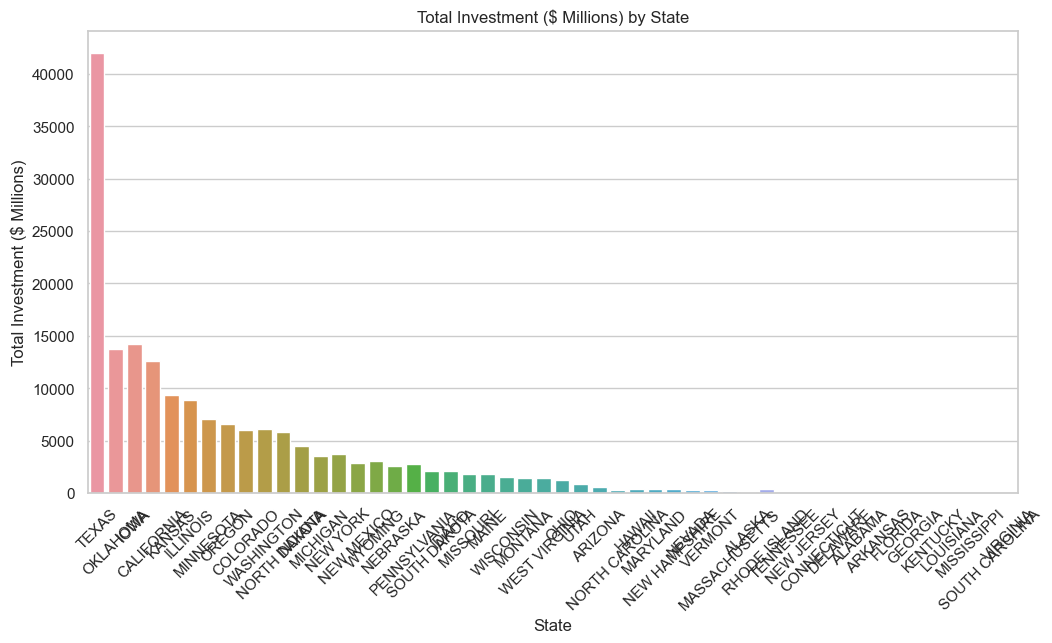

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the data from Excel file
file_path = r"C:\Users\CHHAVI\Downloads\US State Wind Energy Facts 2018.xlsx"
df = pd.read_excel(file_path)

# Set up seaborn style
sns.set(style="whitegrid")

# 1. Bar Chart (Total Investment ($ Millions) by State)
plt.figure(figsize=(12, 6))
bar_chart = sns.barplot(x="State", y="Total Investment ($ Millions)", data=df)
bar_chart.set_title('Total Investment ($ Millions) by State')
bar_chart.set_xticklabels(df["State"], rotation=45)
plt.show()


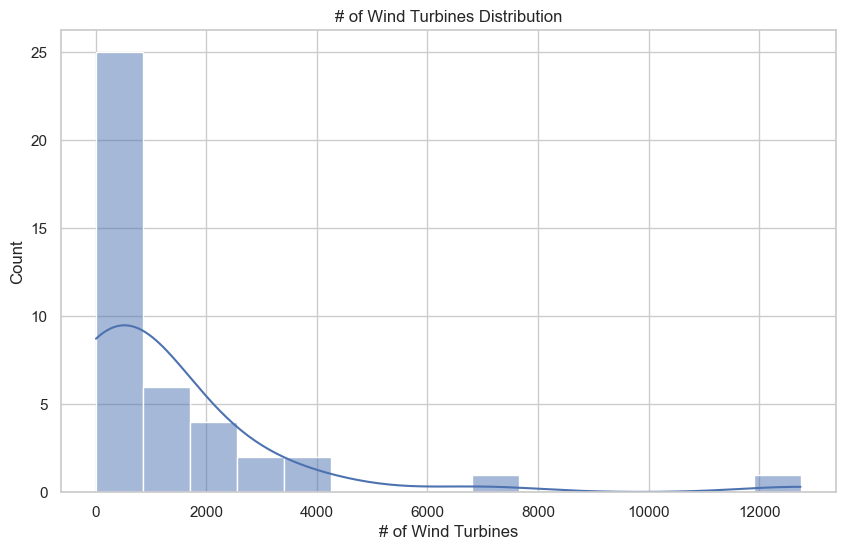

In [50]:

# 2. Histogram (# of Wind Turbines)
plt.figure(figsize=(10, 6))
histogram = sns.histplot(df["# of Wind Turbines"], bins=15, kde=True)
histogram.set_title('# of Wind Turbines Distribution')
plt.show()


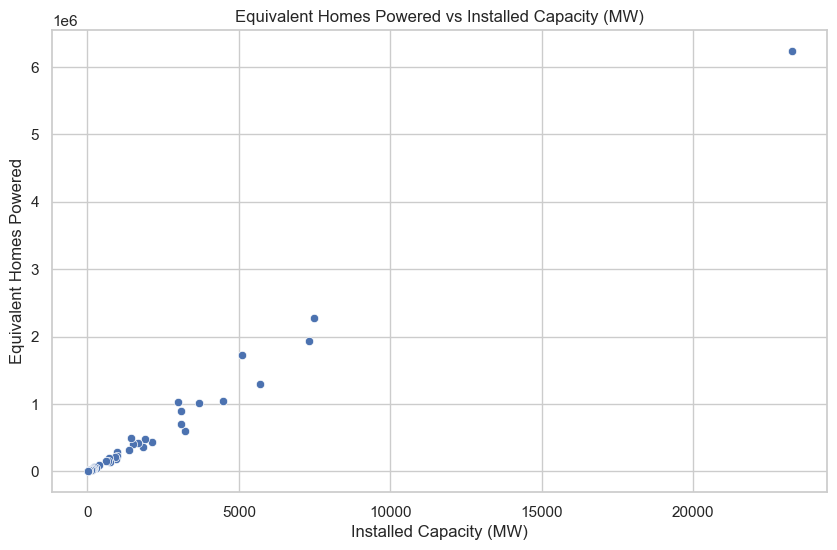

In [51]:

# 3. Scatter Plot (Equivalent Homes Powered vs Installed Capacity (MW))
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x="Installed Capacity (MW)", y="Equivalent Homes Powered", data=df)
scatter_plot.set_title('Equivalent Homes Powered vs Installed Capacity (MW)')
plt.show()


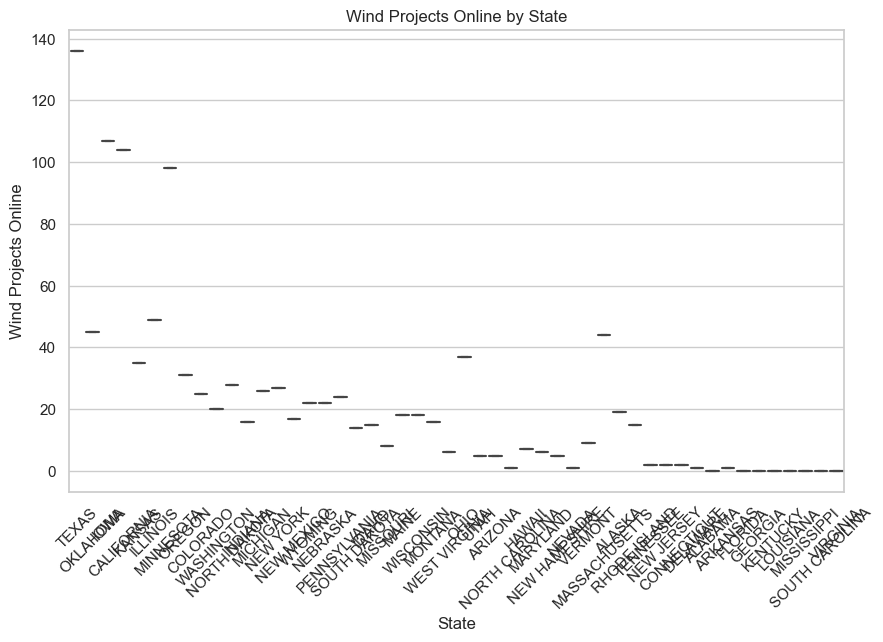

In [52]:

# 4. Box Plot (Wind Projects Online by State)
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x="State", y="Wind Projects Online", data=df)
box_plot.set_title('Wind Projects Online by State')
box_plot.set_xticklabels(df["State"], rotation=45)
plt.show()


C:\Users\CHHAVI\AppData\Local\Temp\ipykernel_7920\1803910588.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



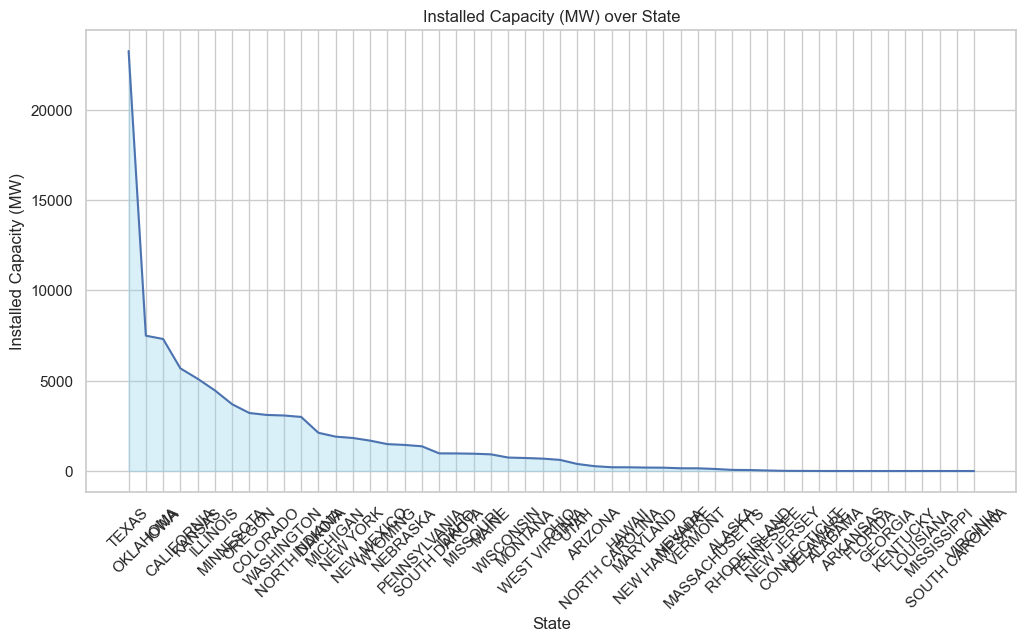

In [53]:

# 5. Area Chart (Installed Capacity (MW) over State)
plt.figure(figsize=(12, 6))
area_chart = sns.lineplot(x="State", y="Installed Capacity (MW)", data=df, sort=False)
area_chart.fill_between(range(len(df)), df["Installed Capacity (MW)"], color="skyblue", alpha=0.3)
area_chart.set_title('Installed Capacity (MW) over State')
area_chart.set_xticklabels(df["State"], rotation=45)
plt.show()


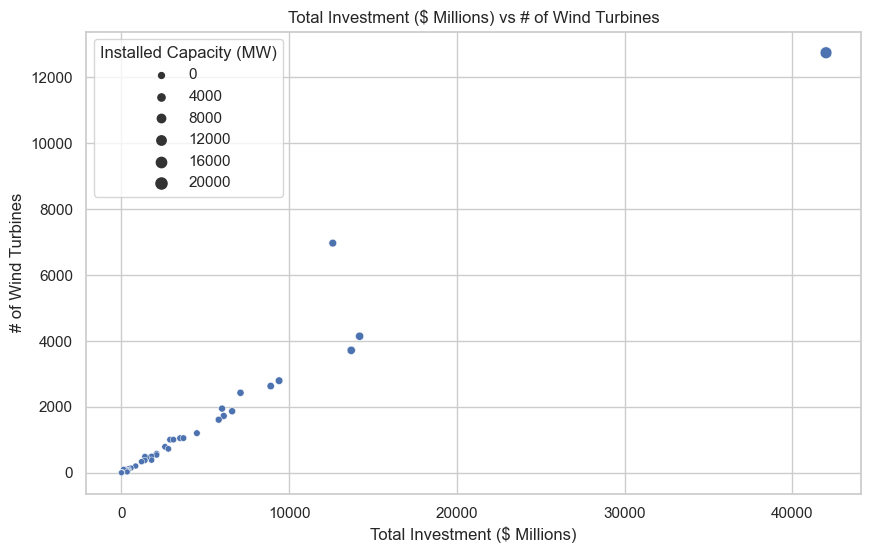

In [54]:

# 6. Bubble Chart (Total Investment ($ Millions) vs # of Wind Turbines)
plt.figure(figsize=(10, 6))
bubble_chart = sns.scatterplot(x="Total Investment ($ Millions)", y="# of Wind Turbines", size="Installed Capacity (MW)", data=df)
bubble_chart.set_title('Total Investment ($ Millions) vs # of Wind Turbines')
plt.show()


C:\Users\CHHAVI\AppData\Local\Temp\ipykernel_7920\2897021674.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



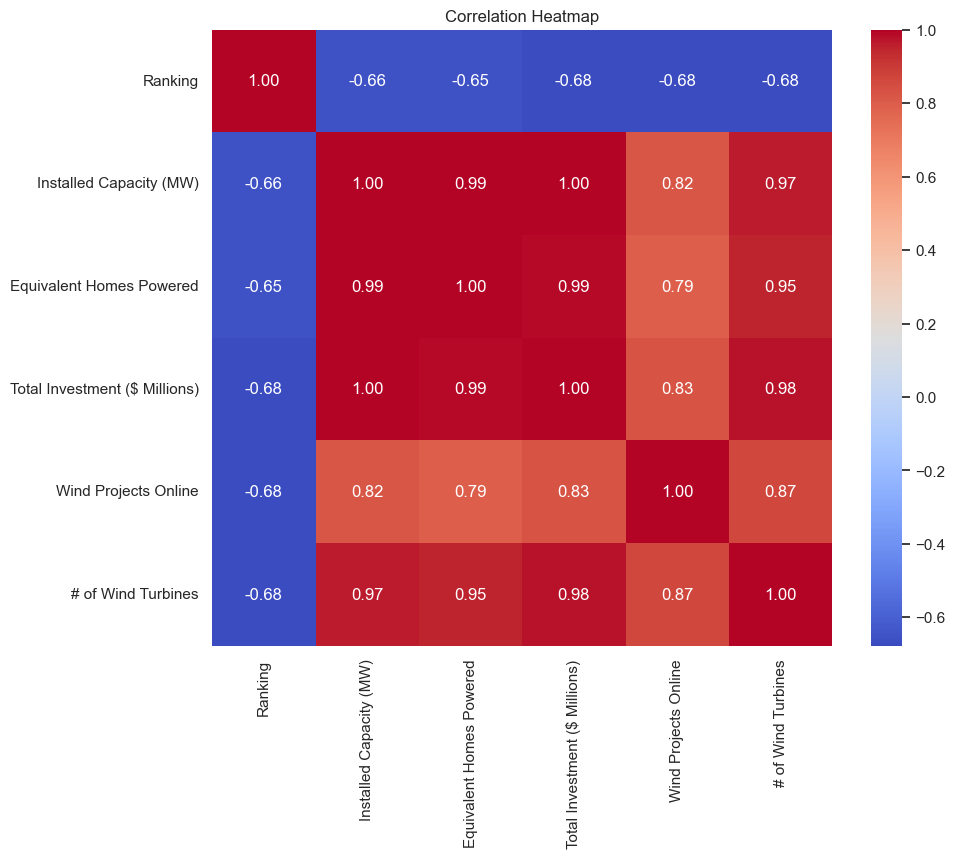

In [55]:

# Interactive heatmap for correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation Heatmap')
plt.show()


Charts with respect to Google's green IT and sustainability initiatives:

1. **Bar Chart (Total MWp by Country)**:
   - Google, being a global company, can use the bar chart to understand the distribution of solar power capacity across different countries. This visualization helps Google identify regions where they can invest in renewable energy projects or partner with existing initiatives to promote sustainability on a global scale.

2. **Scatter Plot (MWp vs Acres)**:
   - Google places a strong emphasis on efficiency and resource optimization. The scatter plot depicting the relationship between megawatts peak capacity and land area occupied by solar power plants helps Google assess the efficiency of land usage in solar energy generation. It allows them to identify opportunities for maximizing energy output while minimizing land use, aligning with their sustainability goals.

3. **Bubble Chart (MWp vs Year)**:
   - Google's commitment to sustainability involves tracking the progress of renewable energy adoption over time. The bubble chart displaying megawatts peak capacity of solar power plants over the years enables Google to monitor the growth trends and identify emerging markets or regions where they can expand their renewable energy investments.

4. **Line Chart (MWp Over Time)**:
   - Google's long-term sustainability strategy requires understanding the trajectory of renewable energy capacity growth globally. The line chart showcasing megawatts peak capacity over time for different countries provides valuable insights into the overall trend and allows Google to compare the growth trajectories of different regions, informing their strategic decisions and investments in renewable energy projects.

5. **Choropleth Map (Total MWp by Country)**:
   - As a multinational corporation, Google operates in various countries with different regulatory environments and renewable energy potentials. The choropleth map illustrating the total megawatts peak capacity by country offers Google a geographic perspective on the distribution of solar energy generation capacity. It helps them identify regions with high capacity levels and prioritize their sustainability initiatives and investments accordingly.


In [88]:
import pandas as pd
import plotly.express as px

# Load the data from Excel file
file_path = r"C:\Users\CHHAVI\Downloads\20 Largest Solar Power Plants.xlsx"
df = pd.read_excel(file_path)

# 1. Bar Chart (Total MWp by Country)
bar_chart = px.bar(df, x='Country', y='MWp (Megawatts Peak Capacity)', 
                   title='Total MWp by Country')
bar_chart.show()


In [57]:

# 2. Scatter Plot (MWp vs Acres)
scatter_plot = px.scatter(df, x='MWp (Megawatts Peak Capacity)', y='Acres', 
                          title='Megawatts Peak Capacity vs Acres',
                          hover_name='Name', color='Country')
scatter_plot.show()


In [58]:

# 3. Bubble Chart (MWp vs Year)
bubble_chart = px.scatter(df, x='Year', y='MWp (Megawatts Peak Capacity)', 
                          size='MWp (Megawatts Peak Capacity)', 
                          title='Megawatts Peak Capacity by Year',
                          hover_name='Name', color='Country')
bubble_chart.show()


In [59]:

# 4. Line Chart (MWp Over Time)
line_chart = px.line(df, x='Year', y='MWp (Megawatts Peak Capacity)', 
                     title='Megawatts Peak Capacity Over Time',
                     color='Country')
line_chart.show()


In [60]:

# 5. Choropleth Map (Total MWp by Country)
choropleth_map = px.choropleth(df, locations='Country', locationmode='country names', 
                               color='MWp (Megawatts Peak Capacity)', 
                               title='Total MWp by Country',
                               hover_name='Country', color_continuous_scale=px.colors.sequential.Plasma)
choropleth_map.show()


1. **Bar Chart (Average Annual Fuel Use by Vehicle Type)**:
   - The bar chart provides a straightforward comparison of the average annual fuel use by different vehicle types. This visualization is significant as it allows stakeholders to quickly identify which vehicle types consume more fuel on average, helping them make informed decisions regarding fuel efficiency improvements and sustainable transportation initiatives.

In [61]:
import pandas as pd
import plotly.express as px

# Load the data from Excel file
file_path = r"C:\Users\CHHAVI\Downloads\Average Annual Fuel Use by Vehicle Type.xlsx"
df = pd.read_excel(file_path)

# 1. Bar Chart (Average Annual Fuel Use by Vehicle Type)
bar_chart = px.bar(df, x='Vehicle Type', y='Annual Fuel Use (GGE)', 
                   title='Average Annual Fuel Use by Vehicle Type')
bar_chart.show()


Here's the explanation for why I chose the following charts:

1. **Line Chart (Greenhouse Gas Emissions Over Time)**:
   - The line chart provides a clear visualization of the trend in greenhouse gas emissions by economic sector over time. Each line represents a different economic sector, allowing stakeholders to easily compare emissions trends across sectors. This visualization is significant as it helps in identifying sectors that are major contributors to greenhouse gas emissions and tracking progress towards emission reduction goals over time. It enables stakeholders to make data-driven decisions and prioritize efforts to mitigate emissions effectively.

2. **Area Chart (Greenhouse Gas Emissions Over Time)**:
   - The area chart also illustrates the trend in greenhouse gas emissions by economic sector over time, but with the area below the lines filled to emphasize the cumulative emissions over time. This visualization highlights the overall magnitude of emissions from each sector and their cumulative impact on the environment. It provides stakeholders with a comprehensive view of emissions trends and helps in understanding the total contribution of each sector to greenhouse gas emissions. This understanding is crucial for devising effective strategies for emission reduction and promoting sustainability initiatives.


In [62]:
import pandas as pd
import plotly.express as px

# Load the data from Excel file
file_path = r"C:\Users\CHHAVI\Downloads\US Greenhouse Gas Emissions by Economic Sector.xlsx"
df = pd.read_excel(file_path)

# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Line Chart (Greenhouse Gas Emissions Over Time)
line_chart = px.line(df, x='Year', y=df.columns[1:], 
                     title='Greenhouse Gas Emissions by Economic Sector Over Time',
                     labels={'value': 'MMT CO2 eq', 'Year': 'Year'})
line_chart.show()

# Area Chart (Greenhouse Gas Emissions Over Time)
area_chart = px.area(df, x='Year', y=df.columns[1:], 
                     title='Greenhouse Gas Emissions by Economic Sector Over Time',
                     labels={'value': 'MMT CO2 eq', 'Year': 'Year'})
area_chart.show()


1. **Bar Chart (Consumption of Natural Gas by Sector)**:
   - This bar chart visually represents the consumption of natural gas across different sectors, such as electric power, industrial consumers, residential consumers, commercial consumers, etc. Understanding the distribution of natural gas consumption among various sectors is crucial for green IT initiatives. It helps in identifying sectors with the highest consumption levels, allowing organizations like Google to focus their sustainability efforts on optimizing energy usage and promoting energy-efficient technologies in those sectors.

2. **Pie Chart (Share of Natural Gas Consumption by Sector)**:
   - The pie chart illustrates the proportion of natural gas consumption attributed to each sector. This visualization provides a clear overview of the relative contribution of different sectors to overall natural gas consumption. For Google, which aims to reduce its carbon footprint and promote sustainable energy practices, knowing the share of consumption by each sector helps in prioritizing areas for intervention. By targeting sectors with higher consumption shares, Google can implement targeted strategies to reduce energy consumption and transition to cleaner energy sources.

3. **Area Chart (Consumption of Natural Gas Over Time)**:
   - The area chart displays the trend of natural gas consumption over time, allowing for the visualization of consumption patterns and fluctuations. Tracking the historical consumption of natural gas enables organizations to identify long-term trends and anticipate future demand. This knowledge is invaluable for green IT initiatives as it informs strategic planning and decision-making processes. By analyzing consumption trends over time, Google can identify opportunities to implement energy-saving measures, invest in renewable energy sources, and optimize energy management systems to reduce reliance on natural gas and mitigate environmental impact.

This knowledge helps in green IT by guiding resource allocation, informing policy decisions, and driving innovation in sustainable energy solutions. By leveraging data-driven insights from these charts, Google can enhance its sustainability efforts, minimize environmental impact, and contribute to a more sustainable future.


In [66]:
import pandas as pd
import plotly.express as px

# Load the data from Excel file
file_path = r"C:\Users\CHHAVI\Downloads\Consumption of Natural Gas in the United States.xlsx"
df = pd.read_excel(file_path)

# Bar Chart (Consumption of Natural Gas by Sector)
bar_chart = px.bar(df, x=df.columns[0], y=df.columns[1], 
                   title='Consumption of Natural Gas by Sector',
                   labels={'value': 'Consumption (Bcf)', 'Electric Power': 'Sector'})
bar_chart.show()

# Pie Chart (Share of Natural Gas Consumption by Sector)
pie_chart = px.pie(df, values=df.columns[1], names=df.columns[0], 
                   title='Share of Natural Gas Consumption by Sector')
pie_chart.show()

# Area Chart (Consumption of Natural Gas Over Time)
area_chart = px.area(df, x=df.columns[0], y=df.columns[1], 
                     title='Consumption of Natural Gas Over Time',
                     labels={'value': 'Consumption (Bcf)', 'Electric Power': 'Year'})
area_chart.show()
